# Identify key users
Identifying key users on social media is important to mitigate the effect of misinformation.
* Malicious users
* Bots
* Persuaders
* Trolls
* Spammers: https://arxiv.org/pdf/1406.1335.pdf

Spammers, viralizers, propagandists, disseminators?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import preprocess
import time
import plotly.express as px

%matplotlib inline
sns.set(style="darkgrid")

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Load data

In [58]:
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
# sorting by time
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
df.sort_values(by='timestamp',inplace=True)
df['viral'] = [1 if (mis!=-1 or sh > 1) else 0 for mis, sh in zip(df['misinformation'], df['shares'])]

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
# # get user data from message data
# start = time.time()
# df_users = utils.get_top_users(df,None)
# df_users.to_csv('data/2018/users.csv',index=False)
# end = time.time()
# print((end-start)/60)

In [59]:
# users
df_users = pd.read_csv('data/2018/users.csv')

# credibility score with laplace smoothing
df_users['credibility'] = 1-df_users['misinformation']/(df_users['virals']+1)
df_users.head(5)

,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,22,0.005005,609,...,153,672588,153,3366,10,153,1530,0.002275,0.454545,0.565217
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,223,0.095626,363,...,1710,498161,1631,47054,58,1506,11907,0.024871,0.260090,0.741071
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,534,391490,534,43406,85,534,15800,0.041182,0.374449,0.627193
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,104,0.051485,258,...,895,644390,895,26260,25,866,6179,0.012376,0.240385,0.761905
4,170916900626840870,1,1810,828,0.457459,982,0.542541,96,0.053039,24,...,153,276930,153,14688,69,153,10557,0.038122,0.718750,0.288660


In [62]:
print(df_users.columns)
df_users = df_users.drop(columns=['daily_95', 'daily_outliers'])

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'daily_max',
       'degree_centrality', 'strenght', 'viral_degree_centrality',
       'viral_strenght', 'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility'],
      dtype='object')


In [63]:
print('total users: ', len(df_users))

total users:  5364


# Distributions of variables

In [64]:
def outlier_iqr(s):
    q3 = s.quantile(0.75)
    q1 = s.quantile(0.25)
    out = q3+1.5*(q3-q1)
    return out

def outlier(s, percentile = 0.95):
    out = s.quantile(percentile)
    return out

# Number of messages (activity)

In [65]:
print('raw number of messages')

print(df_users['number_of_messages'].describe())

msg_outlier = outlier(df_users['number_of_messages'])
print('outliers: ', msg_outlier)

raw number of messages
count    5364.000000
mean       52.684750
std       138.060355
min         1.000000
25%         3.000000
50%        13.000000
75%        45.000000
max      4396.000000
Name: number_of_messages, dtype: float64
outliers:  232.84999999999945


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



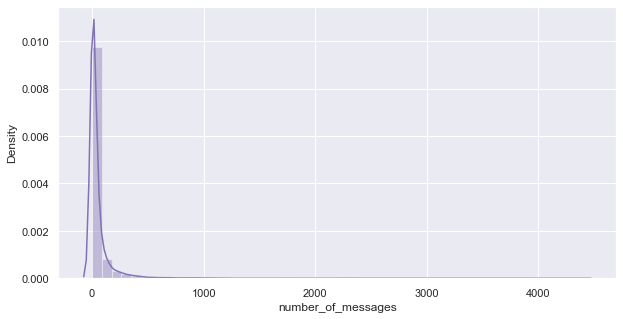

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(df_users['number_of_messages'], kde = True, color = 'C4')
plt.show()

In [67]:
print('users with low activity')
df_users[df_users['number_of_messages'] < df_users['number_of_messages'].quantile(0.25)]

users with low activity


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
4286,8336488125908935379,1,2,2,1.0,0,0.0,0,0.0,0,...,89,178,0,0,0,0,0,0.0,0.0,1.0
4287,6875491021077833123,1,2,0,0.0,2,1.0,0,0.0,0,...,92,184,0,0,0,0,0,0.0,0.0,1.0
4288,-3336310125646763359,1,2,0,0.0,2,1.0,0,0.0,0,...,75,150,0,0,0,0,0,0.0,0.0,1.0
4289,-2527878442120488955,1,2,2,1.0,0,0.0,0,0.0,0,...,140,280,0,0,0,0,0,0.0,0.0,1.0
4290,-7122587308028551890,1,2,0,0.0,2,1.0,0,0.0,0,...,166,332,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,-3685511676029813622,1,1,0,0.0,1,1.0,0,0.0,0,...,166,166,0,0,0,0,0,0.0,0.0,1.0
5360,-3687281691650946329,1,1,0,0.0,1,1.0,0,0.0,0,...,188,188,0,0,0,0,0,0.0,0.0,1.0
5361,4870300454101875011,1,1,1,1.0,0,0.0,0,0.0,0,...,57,57,0,0,0,0,0,0.0,0.0,1.0
5362,7020988212245908273,1,1,1,1.0,0,0.0,0,0.0,0,...,91,91,0,0,0,0,0,0.0,0.0,1.0


In [68]:
print('users with high activity (95 percentile)')
df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.95)]

users with high activity (95 percentile)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,22,0.005005,609,...,153,672588,153,3366,10,153,1530,0.002275,0.454545,0.565217
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,223,0.095626,363,...,1710,498161,1631,47054,58,1506,11907,0.024871,0.260090,0.741071
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,534,391490,534,43406,85,534,15800,0.041182,0.374449,0.627193
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,104,0.051485,258,...,895,644390,895,26260,25,866,6179,0.012376,0.240385,0.761905
4,170916900626840870,1,1810,828,0.457459,982,0.542541,96,0.053039,24,...,153,276930,153,14688,69,153,10557,0.038122,0.718750,0.288660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,5045562863966605913,1,235,155,0.659574,80,0.340426,20,0.085106,1,...,270,63450,270,5400,17,270,4590,0.072340,0.850000,0.190476
265,-612810256248025955,1,234,68,0.290598,166,0.709402,9,0.038462,0,...,273,63882,273,2457,6,273,1638,0.025641,0.666667,0.400000
266,7376637358209551663,1,233,71,0.304721,162,0.695279,32,0.137339,0,...,97,22601,97,3104,22,97,2134,0.094421,0.687500,0.333333
267,4305486479648129759,5,233,171,0.733906,62,0.266094,94,0.403433,79,...,1116,62170,1116,22842,13,1116,3016,0.055794,0.138298,0.863158


In [69]:
print('analyse only active users')
df_active_users = df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.50)] 

analyse only active users


## Analysis functions

In [70]:
def messages_by_key_users(user, key_users):
    if user in key_users:
        return True
    else:
        return False
    
def group_misinformation(variable, outlier_th, group_name):
    df_group = df_users[df_users[variable] >= outlier_th]
    users_in_group = set(df_group['id'])

    # misinformation
    total_mis = len(df[df['misinformation']==1])
    print('total misinformation: ', total_mis)

    mask = []
    for u in df['id']:
        mask.append(u in users_in_group)  

    df_messages_from_group = df[mask]
    df_misinformation_from_group = df_messages_from_group[df_messages_from_group['misinformation']==1]

    print('total users:',len(df_users))
    print('total {c}: {a:1d} ({b:.1f}%)'.format(a = len(users_in_group), 
                                                b = len(users_in_group)*100/len(df_users), 
                                                c = group_name))
    
    print('total misinformation sent by {b} users: {c:} ({a:.1f}%)'.format(a = len(df_misinformation_from_group)*100/total_mis, 
                                                                            b = group_name, 
                                                                            c = len(df_misinformation_from_group)))
    
def describe_group(variable, group_name, c = 'C0'):
    print(df_active_users[variable].describe())
    outliers = outlier(df_active_users[variable])
    print('outliers threshold: ', outliers)    
    plt.figure(figsize=(10,5))
    sns.distplot(df_active_users[variable], kde = True, color = c)
    plt.show()
    group = df_active_users[df_active_users[variable] > outliers]
    users_in_group = set(group['id'])
    
    group_misinformation(variable, outliers, group_name)
    
    
    return group, users_in_group, outliers

def print_sample_messages(df_group, sorting = 'number_of_messages', user=0, n_sample = 10):
    print()
    df_group.sort_values(by=sorting, ascending=False, inplace = True)
    
    for l in list(df[(df['id']==df_group['id'].iloc[user]) & (df['midia']==0)]['text'].sample(n_sample)):
        print(l)

# Highly active

count    2633.000000
mean      102.587923
std       184.206831
min        14.000000
25%        24.000000
50%        46.000000
75%       103.000000
max      4396.000000
Name: number_of_messages, dtype: float64
outliers threshold:  361.8000000000002


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



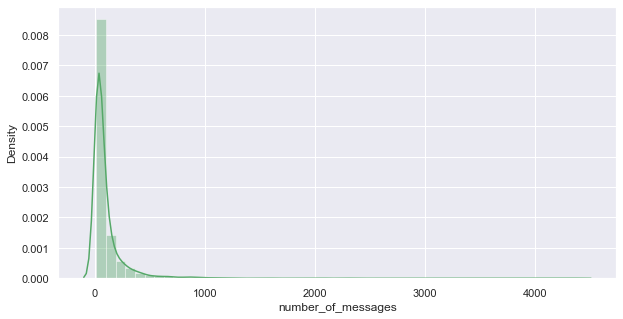

total misinformation:  11412
total users: 5364
total high activity: 132 (2.5%)
total misinformation sent by high activity users: 3750 (32.9%)

Quando matam são as pessoas.
Kkkkkk pior né
👏🏻👏🏻👏🏻
Pelo menos Isso.
Obrigada


<ipython-input-70-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,22,0.005005,609,...,153,672588,153,3366,10,153,1530,0.002275,0.454545,0.565217
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,223,0.095626,363,...,1710,498161,1631,47054,58,1506,11907,0.024871,0.260090,0.741071
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,534,391490,534,43406,85,534,15800,0.041182,0.374449,0.627193
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,104,0.051485,258,...,895,644390,895,26260,25,866,6179,0.012376,0.240385,0.761905
4,170916900626840870,1,1810,828,0.457459,982,0.542541,96,0.053039,24,...,153,276930,153,14688,69,153,10557,0.038122,0.718750,0.288660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3989577167192515002,2,373,311,0.833780,62,0.166220,50,0.134048,56,...,148,20192,148,3760,26,148,1924,0.069705,0.520000,0.490196
128,5887088540656239548,2,369,276,0.747967,93,0.252033,3,0.008130,28,...,346,20622,44,132,1,44,44,0.002710,0.333333,0.750000
129,155157134672886947,1,368,241,0.654891,127,0.345109,15,0.040761,43,...,188,69184,188,2820,6,188,1128,0.016304,0.400000,0.625000
130,3920618611127873918,1,366,189,0.516393,177,0.483607,9,0.024590,34,...,153,55998,153,1377,3,153,459,0.008197,0.333333,0.700000


In [71]:
df_high_activity, high_activity, messages_outlier = describe_group('number_of_messages', 'high activity', c = 'C2')
print_sample_messages(df_high_activity, sorting = 'number_of_messages', user=0, n_sample = 5)
df_high_activity

# Influencers
Users with high degree of conectivity

count    2633.000000
mean      240.422712
std       162.763890
min         3.000000
25%       140.000000
50%       270.000000
75%       302.000000
max      1710.000000
Name: degree_centrality, dtype: float64
outliers threshold:  494.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


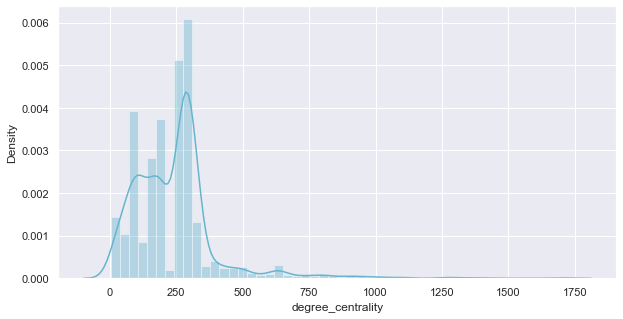

total misinformation:  11412
total users: 5364
total influencers: 170 (3.2%)
total misinformation sent by influencers users: 1702 (14.9%)

Essa é a verdadeira pesquisa que eu faço...muito melhor que o Datafoice e globosta
Nada melhor discutir politica em família democrática...😂😂
Fdpt
🇧🇷🇧🇷👆🏻
Exatamente todos voluntários...pode ter certeza quando oficializar Bolsonaro presidente estarei em lagrimas....não é fanatismo mas é a felicidade em saber que minha filha vai ter um pais longe do socialismo e comunismo...


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,223,0.095626,363,...,1710,498161,1631,47054,58,1506,11907,0.024871,0.260090,0.741071
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,534,391490,534,43406,85,534,15800,0.041182,0.374449,0.627193
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,104,0.051485,258,...,895,644390,895,26260,25,866,6179,0.012376,0.240385,0.761905
10,620937769575483159,8,1103,872,0.790571,231,0.209429,59,0.053490,177,...,1418,177196,1002,9796,23,1002,3531,0.020852,0.389831,0.616667
13,-8623724588738162216,3,1020,279,0.273529,741,0.726471,174,0.170588,155,...,782,261182,782,44858,100,782,25954,0.098039,0.574713,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,8290159486855748515,3,18,16,0.888889,2,0.111111,0,0.000000,1,...,800,5316,0,0,0,0,0,0.000000,0.000000,1.000000
2325,-8401221142032315727,2,18,4,0.222222,14,0.777778,1,0.055556,0,...,634,5814,326,326,0,0,0,0.000000,0.000000,1.000000
2364,-3873778220002154255,3,17,5,0.294118,12,0.705882,0,0.000000,0,...,639,3670,0,0,0,0,0,0.000000,0.000000,1.000000
2492,5121206937748661049,4,15,7,0.466667,8,0.533333,4,0.266667,5,...,739,2869,739,739,0,0,0,0.000000,0.000000,1.000000


In [14]:
df_influencers, influencers, degree_outlier = describe_group('degree_centrality', 'influencers', c = 'C9')
print_sample_messages(df_influencers, sorting = 'number_of_messages', user=0, n_sample = 5)
df_influencers

# Propagandists
High viral strenght

count     2633.000000
mean      1398.875807
std       3963.270557
min          0.000000
25%         26.000000
50%        375.000000
75%       1208.000000
max      96342.000000
Name: viral_strenght, dtype: float64
outliers threshold:  5675.600000000001


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


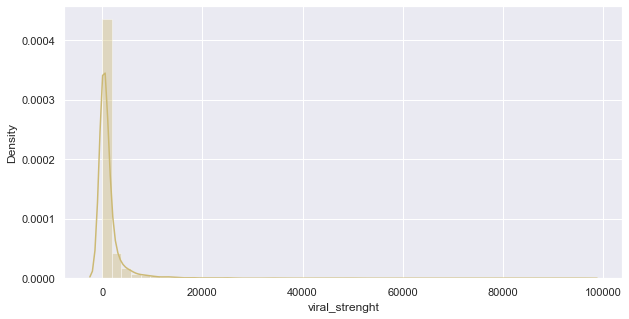

total misinformation:  11412
total users: 5364
total propagandists: 132 (2.5%)
total misinformation sent by propagandists users: 4229 (37.1%)

https://www.youtube.com/watch?v=YynB2NH0nnk
Kkkkkkkkkk
😂😂😂dando o troco
😂😂🇧🇷🇧🇷
*Japão - Suzuka* 🇯🇵 

Bolsonaro 409 x 25 Haddad 
Bolsonaro 418 x 31 Haddad 
Bolsonaro 372 x 27 Haddad
Bolsonaro 364 x 14 Haddad 
Bolsonaro 346 x 16 Haddad

Resultado

*Bolsonaro 94.4%  x 5.6 Haddad* https://t.co/ToTCVzvdCx


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,223,0.095626,363,...,1710,498161,1631,47054,58,1506,11907,0.024871,0.260090,0.741071
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,534,391490,534,43406,85,534,15800,0.041182,0.374449,0.627193
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,104,0.051485,258,...,895,644390,895,26260,25,866,6179,0.012376,0.240385,0.761905
4,170916900626840870,1,1810,828,0.457459,982,0.542541,96,0.053039,24,...,153,276930,153,14688,69,153,10557,0.038122,0.718750,0.288660
5,-6433788305811138375,1,1584,466,0.294192,1118,0.705808,165,0.104167,10,...,153,242352,153,25245,117,153,17901,0.073864,0.709091,0.295181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2509103027295802299,1,91,45,0.494505,46,0.505495,18,0.197802,0,...,326,29666,326,5868,13,326,4238,0.142857,0.722222,0.315789
808,-2686121708101756989,3,84,43,0.511905,41,0.488095,30,0.357143,25,...,641,17126,641,6413,3,641,641,0.035714,0.100000,0.903226
865,8856654168658196425,4,79,32,0.405063,47,0.594937,31,0.392405,23,...,749,14250,749,5684,8,749,1498,0.101266,0.258065,0.750000
1065,-4841082009873797706,10,61,41,0.672131,20,0.327869,32,0.524590,27,...,1681,11674,1681,6070,0,0,0,0.000000,0.000000,1.000000


In [15]:
df_propagandists, propagandists, viral_strenght_outlier = describe_group('viral_strenght', 'propagandists', c = 'C8')
print_sample_messages(df_propagandists, sorting = 'number_of_messages', user=0, n_sample = 5)
df_propagandists

# Possible Bots
Users with suspicious patterns of activity

### Viral ratio

count    2633.000000
mean        0.071288
std         0.089690
min         0.000000
25%         0.003933
50%         0.047619
75%         0.102310
max         1.000000
Name: viral_ratio, dtype: float64
outliers threshold:  0.22742746615087045


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


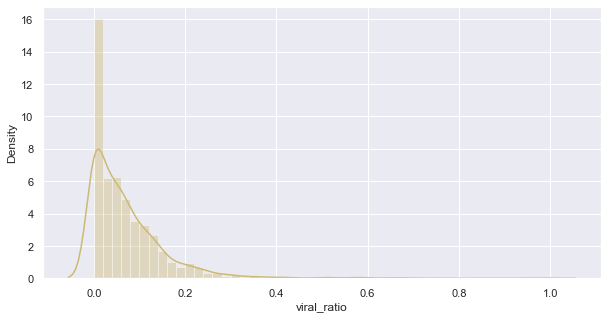

total misinformation:  11412
total users: 5364
total viralizers: 424 (7.9%)
total misinformation sent by viralizers users: 1700 (14.9%)

https://youtu.be/OU84Sica7QY

Força Lucas Belinelli 🙌🙌🙌🙌🙌🙌

                        💫 1⃣7⃣  🇧🇷 ✨✨

*Quarteto Poderoso Chefão no Tocantins:*

Presidente: Bolsonaro 1⃣7⃣
Senador: Farlei 1⃣7⃣7⃣
Federal: Patrícia 1⃣7⃣7⃣7⃣
Estadual: Lucas Belinelle 1⃣7⃣0⃣0⃣0⃣
https://chat.whatsapp.com/BMWSZuY1UfC6ZuUZkTc92J

                         💫😃 1⃣7⃣✨

O mais no grupo de rede Pró-Bolsonaro no Tocantins, chegamos a 46 cidades do interrior do estado. 💚💛

Envie esse link para todos da região de Monte do Carmo.

🚀🚀🚀🚀🚀🚀🚀🚀
Sugestão para o Tocantins:

💫 1⃣7⃣  🇧🇷 ✨✨

Quarteto Poderoso Chefão no Tocantins:

Presidente: Bolsonaro 1⃣7⃣
Senador: Farlei 1⃣7⃣0⃣
Federal: Patrícia 1⃣7⃣7⃣7⃣
Estadual: Professor Edison 1⃣7⃣7⃣0⃣0⃣
https://chat.whatsapp.com/BMWSZuY1UfC6ZuUZkTc92J

                         💫😃 1⃣7⃣✨

O mais no grupo de rede Pró-Bolsonaro no Tocantins, chegamos a 46 cidade

<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
16,-9166534760459654877,8,964,640,0.663900,324,0.336100,564,0.585062,497,...,1260,169073,1260,96342,111,1260,18523,0.115145,0.196809,0.803540
18,-4365731339186281047,7,951,406,0.426919,545,0.573081,258,0.271293,265,...,1266,180079,1266,49716,135,1266,25971,0.141956,0.523256,0.478764
39,-5426274422942733548,6,712,431,0.605337,281,0.394663,281,0.394663,178,...,1080,150659,1080,58028,141,1080,28601,0.198034,0.501779,0.500000
70,5428835759879898822,7,530,354,0.667925,176,0.332075,169,0.318868,120,...,1336,146787,1336,40498,53,1336,12711,0.100000,0.313609,0.688235
73,2660222405768274296,3,520,193,0.371154,327,0.628846,129,0.248077,95,...,569,99029,569,23686,21,569,3841,0.040385,0.162791,0.838462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,-3649372505195215632,3,15,15,1.000000,0,0.000000,10,0.666667,7,...,438,2287,438,1462,0,0,0,0.000000,0.000000,1.000000
2553,-1262571921909839756,1,14,7,0.500000,7,0.500000,4,0.285714,0,...,148,2072,148,592,5,148,740,0.357143,1.250000,0.000000
2591,-632311808282765422,3,14,13,0.928571,1,0.071429,7,0.500000,4,...,617,3682,617,1400,0,0,0,0.000000,0.000000,1.000000
2603,2841547953877816965,1,14,11,0.785714,3,0.214286,9,0.642857,5,...,202,2828,202,1818,1,202,202,0.071429,0.111111,0.900000


In [16]:
df_viralizers, viralizers, viral_ratio_outlier = describe_group('viral_ratio', 'viralizers', c = 'C8')
print_sample_messages(df_viralizers, sorting = 'number_of_messages', user=0, n_sample = 5)
df_viralizers

### Midia ratio

count    2633.000000
mean        0.451095
std         0.240415
min         0.000000
25%         0.263158
50%         0.462687
75%         0.640719
max         1.000000
Name: midia_ratio, dtype: float64
outliers threshold:  0.8278017241379311


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


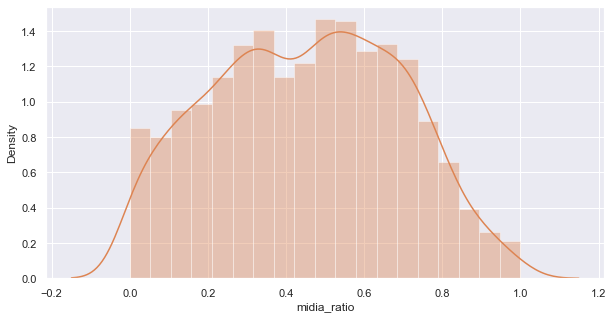

total misinformation:  11412
total users: 5364
total midia sharers: 702 (13.1%)
total misinformation sent by midia sharers users: 151 (1.3%)

Em ato covarde, esquerdistas, atacam crianças do Colégio Militar, com spray de pimenta em desfile de 7 de setembro no Acre.
PM de minas foi baleado em serviço, olhar a recepção quando ele voltou pra casa 👇🏻
https://www.youtube.com/watch?v=gzk-FWm06Uc

Bolsonaro foi avisado que iriam tentar matá-lo!

"INTERCEPTEI UMA MENSAGEM E AVISEI AO BOLSONARO QUE TENTARIAM MATÁ-LO EXATAMENTE DESTA MESMA FORMA COMO ACONTECEU HOJE!"

ANDRÉ BASÍLIO CITA TAMBÉM O NOME DO DEPUTADO DACIOLO ALERTANDO DO PERIGO QUE CORRE...
Ser um dia ter perguntarem com quem andasse, digam com os grandes em sabedoria, com os justos, com os mitos dessa terra 👇🏻
Olha o que o Haddad falou hoje ao sair da PF de Curitiba! Promessa de campanha: o Lula subir a rampa com ele em 01.01.19! Isso é uma afronta aos brasileiros de bem!


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
78,-219310841950453287,1,484,74,0.152893,410,0.847107,12,0.024793,1,...,202,97768,202,2424,9,202,1818,0.018595,0.750000,0.307692
156,-6751793192245753920,2,335,46,0.137313,289,0.862687,7,0.020896,8,...,354,62958,188,1316,2,188,376,0.005970,0.285714,0.750000
262,2456757965557025813,4,237,33,0.139241,204,0.860759,17,0.071730,11,...,739,47556,739,2927,13,739,2111,0.054852,0.764706,0.277778
356,-3459365403520904542,3,181,21,0.116022,160,0.883978,7,0.038674,1,...,353,45308,270,1890,3,270,810,0.016575,0.428571,0.625000
359,4173679385744376,1,181,16,0.088398,165,0.911602,6,0.033149,0,...,25,4525,25,150,3,25,75,0.016575,0.500000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,-2467811906975488182,1,14,1,0.071429,13,0.928571,0,0.000000,0,...,273,3822,0,0,0,0,0,0.000000,0.000000,1.000000
2597,7074938153153379136,1,14,0,0.000000,14,1.000000,0,0.000000,0,...,11,154,0,0,0,0,0,0.000000,0.000000,1.000000
2611,-522115093907410041,1,14,2,0.142857,12,0.857143,0,0.000000,0,...,188,2632,0,0,1,188,188,0.071429,0.000000,0.000000
2619,-3009142299518862577,1,14,1,0.071429,13,0.928571,0,0.000000,0,...,202,2828,0,0,0,0,0,0.000000,0.000000,1.000000


In [17]:
df_midia_sharers, midia_sharers, midia_ratio_outlier = describe_group('midia_ratio', 'midia sharers', c = 'C1')
print_sample_messages(df_midia_sharers, sorting = 'number_of_messages', user=0, n_sample = 5)
df_midia_sharers


# Temporal pattern
Messages by day

In [18]:
df_users[['days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers']].describe()

,days_active,daily_mean,daily_std,daily_median,daily_95,daily_outliers
count,5364.000000,5364.000000,4217.000000,5364.000000,5364.000000,5364.000000
mean,33.325130,2.108895,2.777722,1.369500,5.480397,1.566555
std,30.039501,5.031530,4.656666,4.838491,9.766039,1.458944
min,1.000000,0.027523,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.403762,0.707107,0.000000,1.000000,0.000000
50%,28.000000,1.000000,1.420627,0.000000,2.300000,1.000000
75%,59.000000,2.000000,3.181617,1.000000,5.950000,3.000000
max,120.000000,149.000000,148.492424,149.000000,243.500000,6.000000


count    2633.000000
mean        9.248557
std        12.793024
min         0.000000
25%         3.000000
50%         5.350000
75%        10.550000
max       243.500000
Name: daily_95, dtype: float64
outliers threshold:  28.540000000000006


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


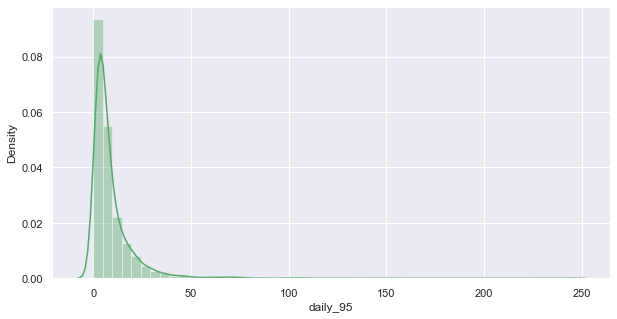

total misinformation:  11412
total users: 5364
total high frequency: 132 (2.5%)
total misinformation sent by high frequency users: 2532 (22.2%)

😉🤝🏻🤝🏻🇧🇷🇧🇷
https://youtu.be/gyGdntVbhl8
Negativem este video.
https://youtu.be/bLasUVgQQqc
Olha o que os jovens estão fazendo em Fortaleza para ajudar o BOLSONARO, vão para o sinal de trânsito e quando o sinal fecha eles cantam músicas do BOLSONARO.
😂😂😂


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,22,0.005005,609,...,153,672588,153,3366,10,153,1530,0.002275,0.454545,0.565217
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,223,0.095626,363,...,1710,498161,1631,47054,58,1506,11907,0.024871,0.260090,0.741071
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,534,391490,534,43406,85,534,15800,0.041182,0.374449,0.627193
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,104,0.051485,258,...,895,644390,895,26260,25,866,6179,0.012376,0.240385,0.761905
4,170916900626840870,1,1810,828,0.457459,982,0.542541,96,0.053039,24,...,153,276930,153,14688,69,153,10557,0.038122,0.718750,0.288660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,1774461991715304158,1,34,34,1.000000,0,0.000000,0,0.000000,30,...,3,102,0,0,0,0,0,0.000000,0.000000,1.000000
1714,2266474191122315389,1,31,20,0.645161,11,0.354839,0,0.000000,9,...,73,2263,0,0,0,0,0,0.000000,0.000000,1.000000
1732,2844188469946317284,1,31,31,1.000000,0,0.000000,0,0.000000,1,...,140,4340,0,0,0,0,0,0.000000,0.000000,1.000000
1771,7546988258114118532,1,30,17,0.566667,13,0.433333,1,0.033333,0,...,166,4980,166,166,0,0,0,0.000000,0.000000,1.000000


In [19]:
df_time_bots, time_bots, time_bots_outlier = describe_group('daily_95', 'high frequency', c = 'C2')
print_sample_messages(df_time_bots, sorting = 'number_of_messages', user=1, n_sample = 5)
df_time_bots

### Compare timeseries of most active users
* top high activity
* top influencer
* top propagandist
* top viralizer
* top midia sharers
* top user with no virals
* top user with no misinformation

Alta atividade
Influenciadores
Propagandistas
Divulgadores de virais
Divulgadores de mídia

In [20]:
def get_user_timeseries(user, frame = '24H'):
    df_user = df[df['id'] == user]
    messages_by_frame = df_user.groupby('timestamp').count()['id'].resample(frame).sum()
    return messages_by_frame

In [21]:
# regular users
top_no_virals = list(df_users[(df_users['virals']==0)]['id'])[0]
top_no_mis = list(df_users[(df_users['misinformation']==0)]['id'])[0]

# engaged users
top_active = list(df_active_users['id'])[0]
top_influencer = list(df_influencers['id'])[0]
top_propagandist = list(df_propagandists['id'])[0]

# possible bots
top_midia_sharer = list(df_midia_sharers['id'])[0]
top_viralizer = list(df_viralizers['id'])[0]

In [54]:

dict_timeseries = {'usuário mais ativo sem mensagens virais': top_no_virals,
                  'usuário mais ativo sem desinformação': top_no_mis,
                  #'usuário mais ativo': top_active,
                  'influenciador mais ativo': top_influencer,
                  'propagandista mais ativo':top_propagandist,
                  'divulgador de virais mais ativo': top_viralizer,
                  'divulgador de mídia mais ativo': top_midia_sharer}

# dict_timeseries = {'usuário mais ativo sem mensagens virais': top_no_virals,
#                   'usuário mais ativo sem desinformação': top_no_mis,
#                   'divulgador de virais mais ativo': top_viralizer,
#                   'divulgador de mídia mais ativo': top_midia_sharer}

timeseries_frames = []
user_group = []
for k in dict_timeseries.keys():
    timeseries = get_user_timeseries(dict_timeseries[k], frame = '1D').to_frame()    
    timeseries_frames.append(timeseries)
    user_group += [k]*len(timeseries)

df_timeseries = pd.concat(timeseries_frames).fillna(int(0))
df_timeseries['categoria'] = user_group
df_timeseries['mensagens por dia'] = df_timeseries['id']
df_timeseries.reset_index(level=0, inplace=True)

In [57]:
fig = px.area(df_timeseries, x='timestamp', y='mensagens por dia', color='categoria',
              facet_col="categoria", hover_name="categoria", facet_col_wrap=2)
fig.show()

# Misinformers

### Raw number of misinformation shared by active users

count    2633.000000
mean        4.136726
std        10.059828
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       147.000000
Name: misinformation, dtype: float64
outliers threshold:  17.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



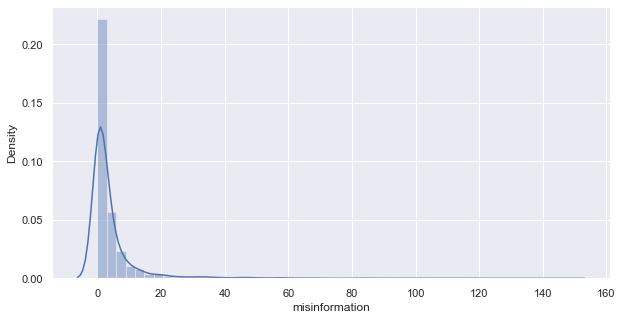

total misinformation:  11412
total users: 5364
total misinformers: 134 (2.5%)
total misinformation sent by misinformers users: 4973 (43.6%)

https://youtu.be/zJGZxiBod7o
*https://youtu.be/4WeiU2dglcQ.......... Olavo de Carvalho convoca a população para uma grande mobilização contra a fraude nas urnas...... compartilhem com todos os seus contatos e grupos do WhatsApp..... Vamos colocar este vídeo em alta no YouTube*
*Sabe por que a REDE GLOBO está orquestrando ataques de artistas, jornalistas e intelectuais contra BOLSONARO e seus eleitores???.........................*   *Porque prometeu acabar com a mamata desses parasitas de dinheiro público*...
⚠❗vamos *_MULTIPLICAR OS GRUPOS DE WHATSAPP COMO VIRUS_* e buscar novos eleitores entre nossos contatos pessoais e grupos de trabalho, parentes, vizinhos, amigos, igreja, clubes, faculdades, etc, ........................🇧🇷........................                                                                         Temos que formar *milhões 

<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
24,2878545449163323727,3,883,439,0.497169,444,0.502831,180,0.203851,177,...,603,172068,603,33081,147,603,26559,0.166478,0.816667,0.187845
39,-5426274422942733548,6,712,431,0.605337,281,0.394663,281,0.394663,178,...,1080,150659,1080,58028,141,1080,28601,0.198034,0.501779,0.500000
18,-4365731339186281047,7,951,406,0.426919,545,0.573081,258,0.271293,265,...,1266,180079,1266,49716,135,1266,25971,0.141956,0.523256,0.478764
5,-6433788305811138375,1,1584,466,0.294192,1118,0.705808,165,0.104167,10,...,153,242352,153,25245,117,153,17901,0.073864,0.709091,0.295181
16,-9166534760459654877,8,964,640,0.663900,324,0.336100,564,0.585062,497,...,1260,169073,1260,96342,111,1260,18523,0.115145,0.196809,0.803540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,8371047632500103882,1,437,118,0.270023,319,0.729977,34,0.077803,4,...,168,73416,168,5712,18,168,3024,0.041190,0.529412,0.485714
486,3076210903474883370,1,141,62,0.439716,79,0.560284,18,0.127660,2,...,57,8037,57,1026,18,57,1026,0.127660,1.000000,0.052632
625,6322190196637205632,2,110,49,0.445455,61,0.554545,37,0.336364,23,...,331,18202,331,6123,18,331,2979,0.163636,0.486486,0.526316
230,3131070151123675038,1,261,101,0.386973,160,0.613027,27,0.103448,1,...,308,80388,308,8316,18,308,5544,0.068966,0.666667,0.357143


In [24]:
df_misinformers, misinformers, misinformation_outlier = describe_group('misinformation', 'misinformers', c = 'C0')
print_sample_messages(df_misinformers, sorting = 'misinformation', user=0, n_sample = 10)
df_misinformers

### Correlations

In [25]:
df_users['misinformer'] = ['misinformer' if m in misinformers else 'non_misinformer' for m in df_users['id']]
df_active_users['misinformer'] = ['misinformer' if m in misinformers else 'non_misinformer' for m in df_active_users['id']]

<ipython-input-25-2ca3941697fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_misinformers.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'daily_max',
       'degree_centrality', 'strenght', 'viral_degree_centrality',
       'viral_strenght', 'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility'],
      dtype='object')

raw


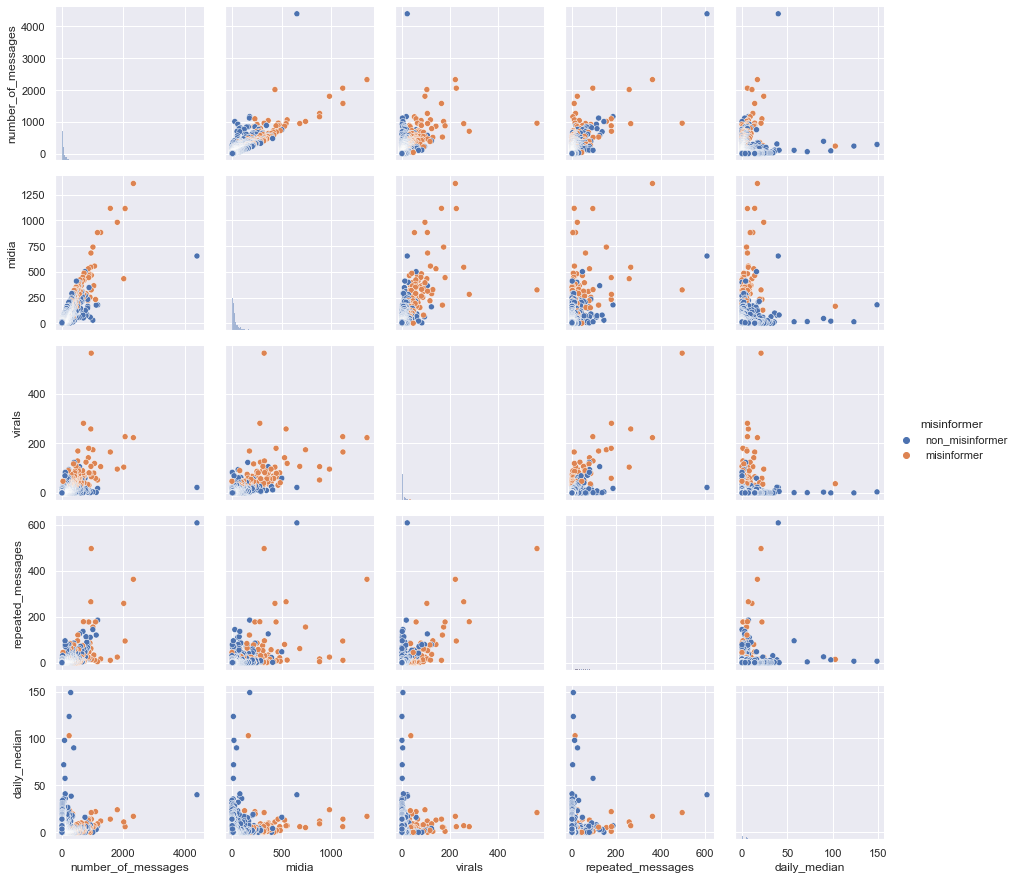

In [27]:
print('raw')
g = sns.PairGrid(df_active_users[['number_of_messages', 'midia', 'virals', 'repeated_messages',
                                  'daily_median','misinformer']], 
                 hue = 'misinformer')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

graph


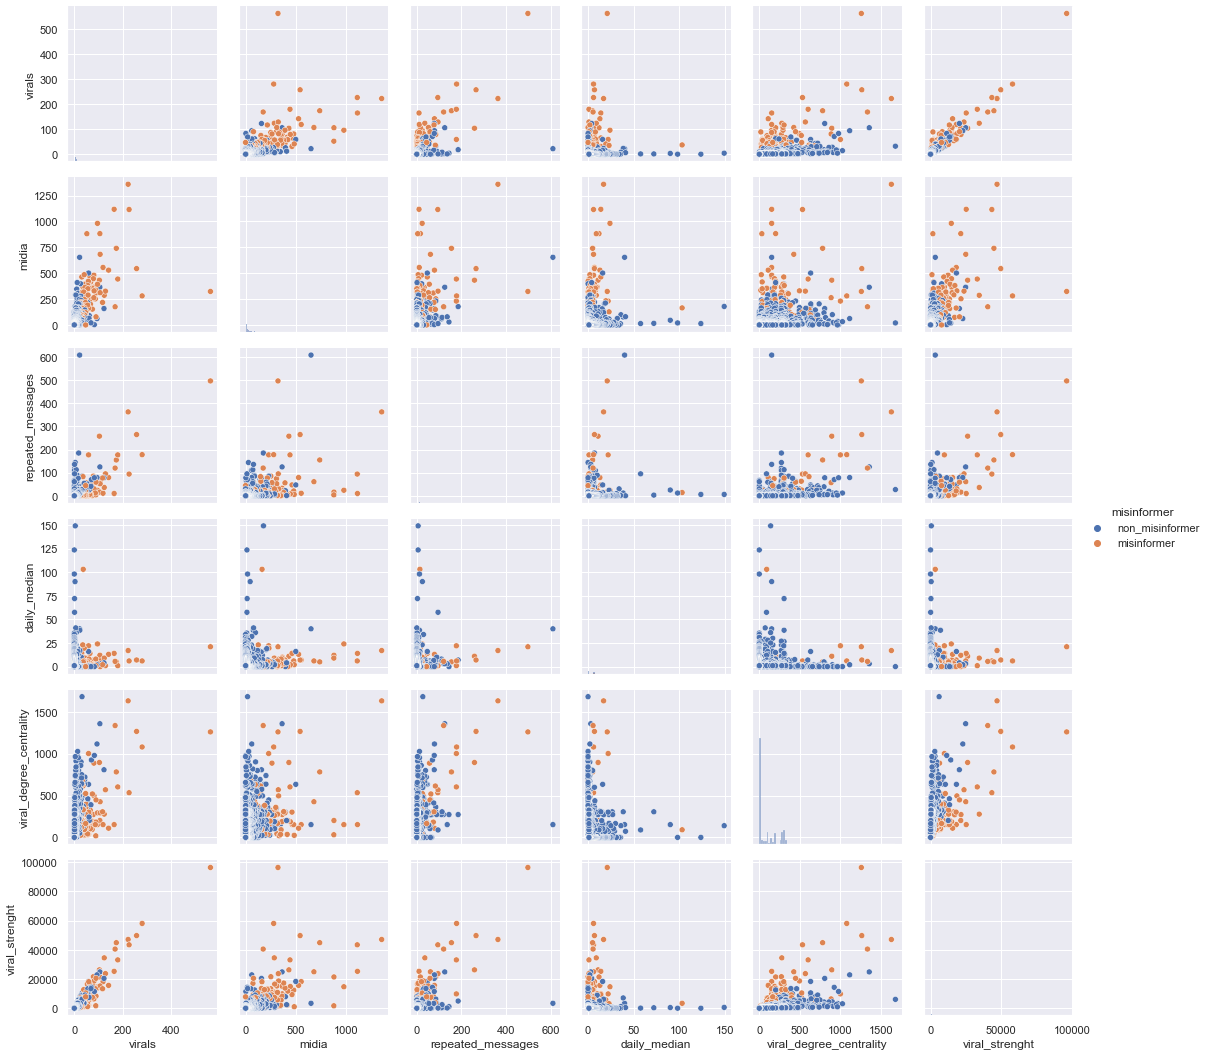

In [28]:
print('graph')
g = sns.PairGrid(df_users[['virals', 'midia','repeated_messages','daily_median','viral_degree_centrality', 'viral_strenght',                            
                           'misinformer']], hue = 'misinformer')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Anoter definition of misinformers based on graph features (strenght of connections): superspreaders

count     2633.000000
mean       756.490315
std       1915.113345
min          0.000000
25%          0.000000
50%        210.000000
75%        652.000000
max      28601.000000
Name: misinformation_strenght, dtype: float64
outliers threshold:  3333.6000000000004


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



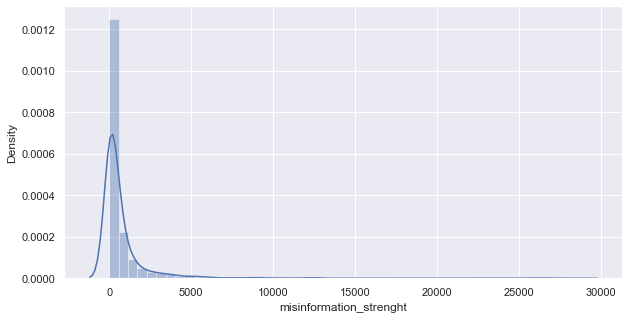

total misinformation:  11412
total users: 5364
total superspreaders: 132 (2.5%)
total misinformation sent by superspreaders users: 4533 (39.7%)

https://youtu.be/zQuOt2NoU_A
*https://youtu.be/UlEJwGiMjSI ................... URGENTE!!!!!    DIVULGUEM AO MÁXIMO!!!*
LISTA DOS 23 SENADORES QUE SE NÃO FOREM REELEITOS PERDEM O FORO
PRIVILEGIADO E PODERÃO SER JULGADOS E PRESO POR CORRUPÇÃO. NÃO VOTE NELES. NAO OS REELEJA.

▶EUNÍCIO OLIVEIRA
▶ROMERO JUCÁ
▶LINDEMBERG FARIAS
▶HUMBERTO COSTA
▶RENAN CALHEIROS
▶GARIBALDI ALVES
▶JADER BARBALHO
▶EDSON LOBÃO
▶GLEISI HOFFMANN
▶AGRIPINO MAIA
▶CIRO NOGUEIRA
▶BENEDITO LIRA
▶ AÉCIO NEVES
▶ ALOYSIO NUNES
▶ CÁSSIO CUNHA LIMA
▶ VANESSA GRAZZIOTIN
▶ LÍDICE DA MATA
▶ VALDIR RAUPP
▶ RICARDO FERRAÇO
▶ IVO CASSOL
▶ DALIRIO BEBER
▶ EDUARDO BRAGA
▶ JORGE VIANA

Estes 23 senadores investigados na Lava Jato ficam sem foro privilegiado se não se elegerem em 2018.
Divulguem, repassem, viralizem isso. 
A lista dos senadores envolvidos na lava-jato precisa ser enviada a t

<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility,misinformer
24,2878545449163323727,3,883,439,0.497169,444,0.502831,180,0.203851,177,...,172068,603,33081,147,603,26559,0.166478,0.816667,0.187845,misinformer
39,-5426274422942733548,6,712,431,0.605337,281,0.394663,281,0.394663,178,...,150659,1080,58028,141,1080,28601,0.198034,0.501779,0.500000,misinformer
18,-4365731339186281047,7,951,406,0.426919,545,0.573081,258,0.271293,265,...,180079,1266,49716,135,1266,25971,0.141956,0.523256,0.478764,misinformer
5,-6433788305811138375,1,1584,466,0.294192,1118,0.705808,165,0.104167,10,...,242352,153,25245,117,153,17901,0.073864,0.709091,0.295181,misinformer
16,-9166534760459654877,8,964,640,0.663900,324,0.336100,564,0.585062,497,...,169073,1260,96342,111,1260,18523,0.115145,0.196809,0.803540,misinformer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4663145275462981855,1,356,229,0.643258,127,0.356742,23,0.064607,4,...,108936,306,7038,12,306,3672,0.033708,0.521739,0.500000,non_misinformer
429,8038726262758897273,1,155,47,0.303226,108,0.696774,17,0.109677,0,...,47430,306,5202,11,306,3366,0.070968,0.647059,0.388889,non_misinformer
413,-6449133970849284306,1,160,41,0.256250,119,0.743750,14,0.087500,0,...,52160,326,4564,11,326,3586,0.068750,0.785714,0.266667,non_misinformer
234,-8683522735082230313,1,253,169,0.667984,84,0.332016,16,0.063241,1,...,77924,308,4928,11,308,3388,0.043478,0.687500,0.352941,non_misinformer


In [29]:
df_superspreaders, superspreaders, misinformation_strenght_outlier = describe_group('misinformation_strenght', 'superspreaders', c = 'C0')
print_sample_messages(df_superspreaders, sorting = 'misinformation', user=0, n_sample = 5)
df_superspreaders

In [30]:
df_users['superspreader'] = ['superspreader' if m in superspreaders else 'non_superspreader' for m in df_users['id']]
df_active_users['superspreader'] = ['superspreader' if m in superspreaders else 'non_superspreader' for m in df_active_users['id']]

<ipython-input-30-d9fa728e7ebb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Correlations

raw


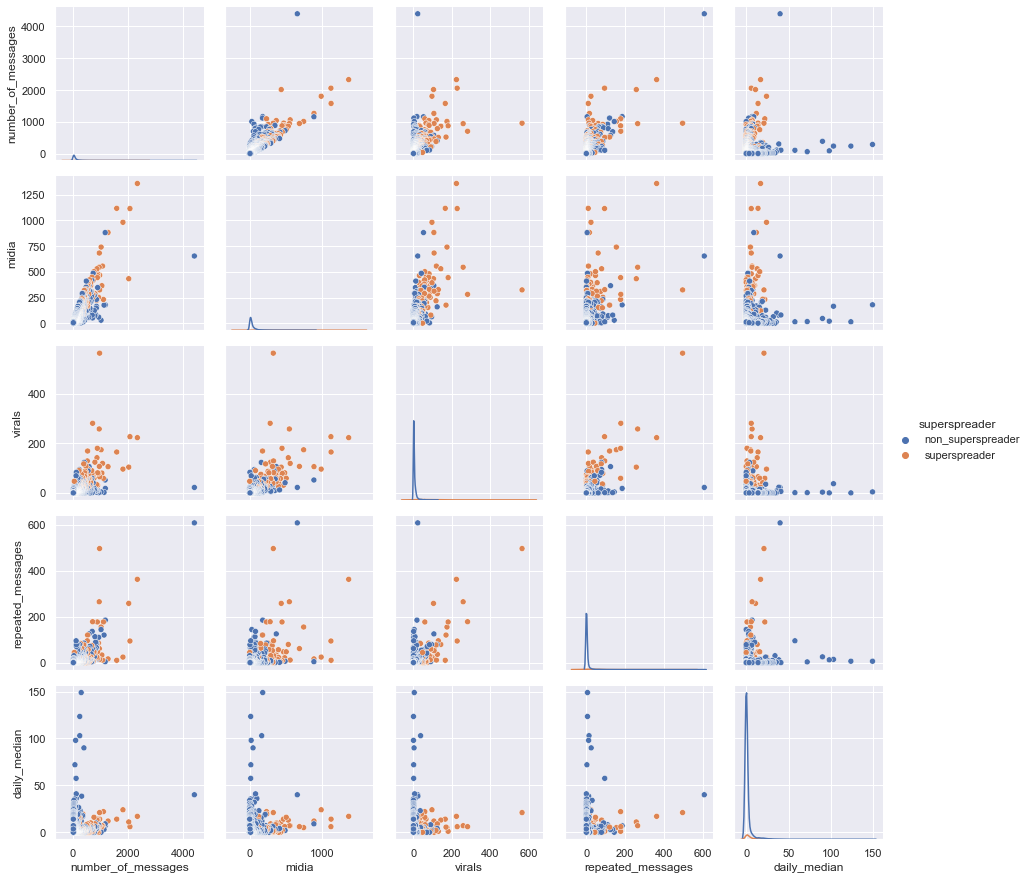

In [31]:
print('raw')
g = sns.PairGrid(df_active_users[['number_of_messages', 'midia', 'virals', 'repeated_messages',
                                  'daily_median','superspreader']], 
                 hue = 'superspreader')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

graph


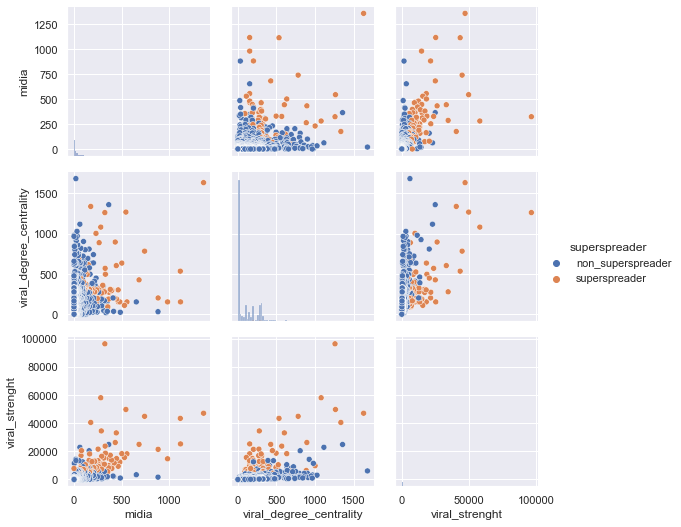

In [32]:
print('graph')
g = sns.PairGrid(df_users[['midia','viral_degree_centrality', 'viral_strenght', 
                           'superspreader']], hue = 'superspreader')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Detection of misinformers

In [33]:
def print_class_balance(y, keys = ['positive', 'negative']):
    pos_mask = y == 1 
    pos = y[pos_mask]
    neg_mask = y == 0 
    neg = y[neg_mask]
    values = [pos.shape[0],neg.shape[0]]
    g = sns.barplot(x = keys, y = values)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 5), textcoords = 'offset points')

superspreaders


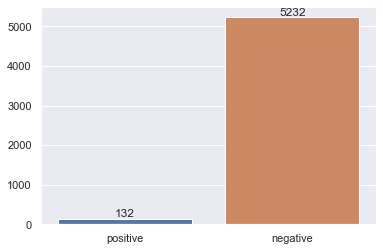

In [34]:
print('superspreaders')
y_s = np.array([1 if m == 'superspreader' else 0 for m in df_users['superspreader']])
print_class_balance(y_s)

misinformers


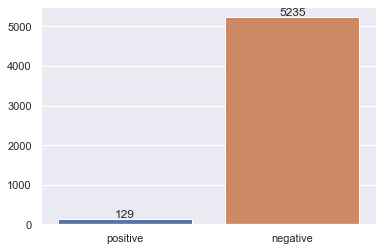

In [35]:
print('misinformers')
y_m = np.array([1 if m == 'misinformer' else 0 for m in df_users['misinformer']])        
print_class_balance(y_m)

## Rules
* viral strenght equal or higher than outlier

In [36]:
def rules_classification(df_users, metrics):
    predictions = []
    for i in range(len(df_users)):
        pred = 0
        u = df_users.iloc[0]['id']
        
        for metric in metrics:
            u_metric = df_users.iloc[i][metric]
            metric_outlier = outlier(df_active_users[metric])
            if u_metric >= metric_outlier:
                pred = 1
                break
                
        predictions.append(pred)
        
    return predictions


In [37]:
df_users.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'daily_max',
       'degree_centrality', 'strenght', 'viral_degree_centrality',
       'viral_strenght', 'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility', 'misinformer',
       'superspreader'],
      dtype='object')

## Superspreaders

### Rule set \#1

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5232
           1       0.76      0.76      0.76       132

    accuracy                           0.99      5364
   macro avg       0.88      0.88      0.88      5364
weighted avg       0.99      0.99      0.99      5364

0,988
0,006
0,757
0,757
0,757
0


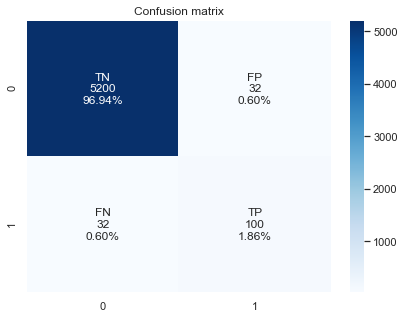

In [38]:
metrics = ['viral_strenght']
y_pred = rules_classification(df_users, metrics)
m1 = utils.get_test_metrics(y_s, y_pred,full_metrics=True)

## Misinformers

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5235
           1       0.76      0.81      0.78       129

    accuracy                           0.99      5364
   macro avg       0.88      0.90      0.89      5364
weighted avg       0.99      0.99      0.99      5364

0,989
0,005
0,764
0,806
0,784
0


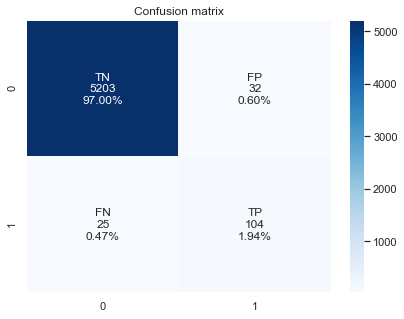

In [39]:
metrics = ['virals']
y_pred = rules_classification(df_users, metrics)
m1 = utils.get_test_metrics(y_m, y_pred,full_metrics=True)

# Machine learning model

In [40]:
df_users.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'daily_max',
       'degree_centrality', 'strenght', 'viral_degree_centrality',
       'viral_strenght', 'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility', 'misinformer',
       'superspreader'],
      dtype='object')

In [41]:
all_features = ['groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
               'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
               'repeated_messages_ratio', 'days_active', 'daily_mean',
               'daily_median', 'daily_95', 'daily_outliers', 'degree_centrality',
               'strenght', 'viral_degree_centrality', 'viral_strenght']

X = df_users[all_features] #.to_numpy()
y = y_s

# normalization
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X_z = (X - mu ) / sigma

In [42]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

[0.00693767 0.         0.00388344 0.0069902  0.06681851 0.00370692
 0.01013394 0.00469295 0.         0.05568702 0.01331467 0.03466593
 0.00388344 0.01339825 0.00328599 0.02008172 0.01927581 0.01598674
 0.71725679]


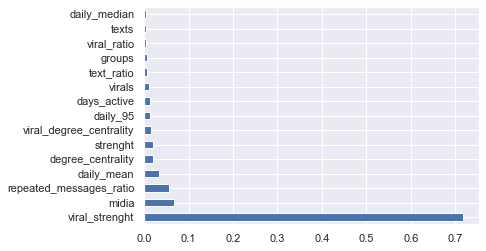

In [43]:
# feature importance
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_z, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [44]:
features = list(feat_importances.nlargest(10).index)
features

['viral_strenght',
 'midia',
 'repeated_messages_ratio',
 'daily_mean',
 'degree_centrality',
 'strenght',
 'viral_degree_centrality',
 'daily_95',
 'days_active',
 'virals']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, stratify = y, random_state=42)
X_rule = X_test['viral_strenght']
X_train, X_test = utils.z_score(X_train, X_test)

statistical rule
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       0.88      0.81      0.84        26

    accuracy                           0.99      1073
   macro avg       0.94      0.90      0.92      1073
weighted avg       0.99      0.99      0.99      1073

0,992
0,003
0,875
0,807
0,840
0


(0.9925442684063374,
 0.003816793893129722,
 0.875,
 0.8076923076923077,
 0.8400000000000001,
 0)

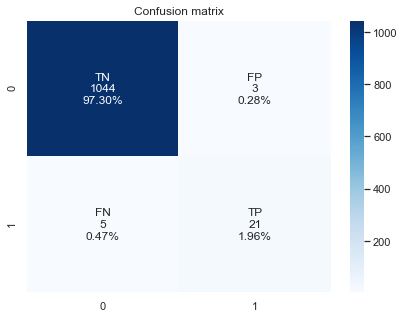

In [46]:
print('statistical rule')

y_pred = [1 if vir >= viral_strenght_outlier else 0 for vir in X_rule]
utils.get_test_metrics(y_test, y_pred, full_metrics = True)

logistic regression
0.21
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       0.92      0.92      0.92        26

    accuracy                           1.00      1073
   macro avg       0.96      0.96      0.96      1073
weighted avg       1.00      1.00      1.00      1073

AUC:  0.9980163103372273


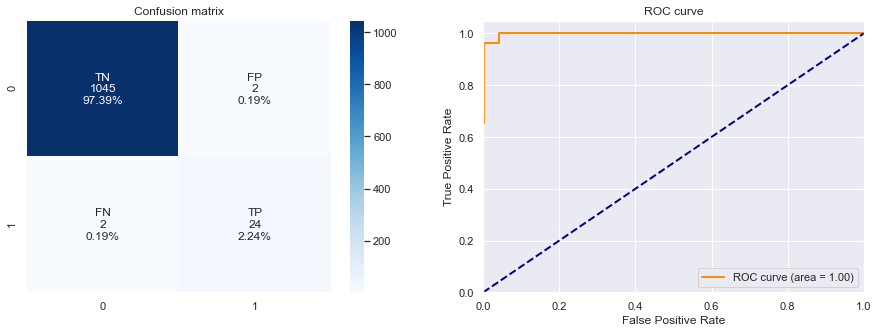

0,996
0,001
0,923
0,923
0,923
0,998


(0.9962721342031687,
 0.0019102196752626144,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9980163103372273)

In [47]:
print('logistic regression')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# Sources of misinformation

In [48]:
sources = dict(zip(list(df_users['id']), [0]*len(df_users['id'])))
df_users['id']
unique_labelled_texts = df[(df['midia']==0) & (df['misinformation']!=-1)].drop_duplicates(subset='text')['text']
for t in unique_labelled_texts:
    u = df[df['text']==t].sort_values(by='timestamp')['id'].values[0]
    sources[u] += 1
    

In [49]:
df_users['sources'] = np.array(list(sources.values()))
df_active_users = df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.50)] 

count    2633.000000
mean        2.513483
std         5.764165
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        92.000000
Name: sources, dtype: float64
outliers threshold:  10.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



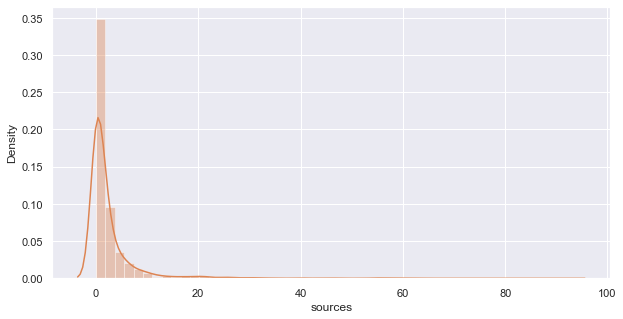

total misinformation:  11412
total users: 5364
total sources of misinformation: 151 (2.8%)
total misinformation sent by sources of misinformation users: 4681 (41.0%)

https://youtu.be/EWSJgrE_HOQ


A TV Anhanguera, Jornal do Tocantins e portal da Roberta Tum estão escondendo isso de você eleitor!

Existe um movimento crescente de apoio a Bolsonaro em reação ao EleNão, tanto que Bolsonaro cresceu nas pesquisas após a onda de ataques do PT, Psol, Rede,  PDT, PSDB...

Carreata “Força Capitão” chegou a Novo Acordo do Tocantins. 

Os atos Pró-Bolsonaro avançam por todo o estado do Tocantins. 

Depois da grande carreata da vitória das cidades de Palmas, Araguaína, Gurupi, Augustinópolis, Abreulândia, Praia Norte, Porto Nacional, Aparecida do Rio Negro, Lagoa do Tocantins, Pedro Afonso, Sítio Novo, Paraíso, entre outras, agora chegou a vez de Novo Acordo, de Buritirana, de Ponte Alta do Tocantins, as carreatas acontecerão na sexta-feira no dia 5 de outubro. 

O Ele Sim a TV Anhanguera, a jorn

<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility,misinformer,superspreader,sources
16,-9166534760459654877,8,964,640,0.663900,324,0.336100,564,0.585062,497,...,96342,111,1260,18523,0.115145,0.196809,0.803540,misinformer,superspreader,92
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,227,0.109981,94,...,43406,85,534,15800,0.041182,0.374449,0.627193,misinformer,superspreader,61
70,5428835759879898822,7,530,354,0.667925,176,0.332075,169,0.318868,120,...,40498,53,1336,12711,0.100000,0.313609,0.688235,misinformer,superspreader,60
39,-5426274422942733548,6,712,431,0.605337,281,0.394663,281,0.394663,178,...,58028,141,1080,28601,0.198034,0.501779,0.500000,misinformer,superspreader,59
24,2878545449163323727,3,883,439,0.497169,444,0.502831,180,0.203851,177,...,33081,147,603,26559,0.166478,0.816667,0.187845,misinformer,superspreader,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,6925899183126115693,1,233,68,0.291845,165,0.708155,19,0.081545,0,...,5738,13,302,3926,0.055794,0.684211,0.350000,non_misinformer,superspreader,11
165,-1685659462484279513,1,321,225,0.700935,96,0.299065,36,0.112150,3,...,11016,28,306,8568,0.087227,0.777778,0.243243,misinformer,superspreader,11
245,-6897761428797743478,1,247,82,0.331984,165,0.668016,37,0.149798,14,...,3367,20,91,1820,0.080972,0.540541,0.473684,misinformer,non_superspreader,11
226,-8497459254880983026,1,266,103,0.387218,163,0.612782,23,0.086466,10,...,6946,9,302,2718,0.033835,0.391304,0.625000,non_misinformer,non_superspreader,11


In [50]:
df_sources, sources, sources_outlier = describe_group('sources', 'sources of misinformation', c = 'C1')
print_sample_messages(df_sources, sorting = 'sources', user=0, n_sample = 5)
df_sources

# Intersection between groups
* most_active (post a lot of messages) **maybe change names?**
* influencers (highly connected - )
* propagandists (post abnormal quantity of viral messages - viral ratio or **virals**?)
* midia_sharers (post abnormal quantity of midia - midia ratio)
* misinformers (post abnormal quantity of misinformation)
* superspreaders (abnormal quantity of reach of misinformation)

In [51]:
user_groups = {'high_activity':high_activity,
                    'influencers':influencers,
                    'propagandists':propagandists,
                    'viralizers':viralizers,
                    'midia_sharers':midia_sharers,                    
                    'misinformers':misinformers,
                    'superspreaders':superspreaders,
                    'sources of misinformation': sources}

In [52]:
intersections = np.zeros((len(user_groups), len(user_groups)))
for i, k in enumerate(user_groups):
    for j, p in enumerate(user_groups):
        intersec = user_groups[k].intersection(user_groups[p])
        len_intersec = len(intersec)
        total_len = len(user_groups[k])
        percentage = len_intersec/total_len
        intersections[i][j] = percentage
        
df_intersections = pd.DataFrame(intersections, columns = user_groups, index = user_groups).round(2)
df_intersections.style.background_gradient(cmap ='Blues')

,high_activity,influencers,propagandists,viralizers,midia_sharers,misinformers,superspreaders,sources of misinformation
high_activity,1.000000,0.160000,0.480000,0.060000,0.010000,0.540000,0.480000,0.530000
influencers,0.160000,1.000000,0.230000,0.240000,0.030000,0.160000,0.160000,0.170000
propagandists,0.480000,0.230000,1.000000,0.190000,0.000000,0.640000,0.760000,0.650000
viralizers,0.060000,0.230000,0.190000,1.000000,0.000000,0.140000,0.100000,0.160000
midia_sharers,0.010000,0.030000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
misinformers,0.550000,0.160000,0.650000,0.140000,0.000000,1.000000,0.750000,0.670000
superspreaders,0.480000,0.150000,0.760000,0.100000,0.000000,0.730000,1.000000,0.580000
sources of misinformation,0.550000,0.170000,0.680000,0.170000,0.000000,0.680000,0.600000,1.000000
